In [276]:
import os, json, csv
import pandas as pd
from pandas import json_normalize
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [277]:
dir_path = 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata'
files = os.listdir(dir_path)

metadata = []
for name in files:
    if name.endswith('.csv'):
        metadata.append(dir_path + "/" + name)

metadata

['C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/results_26301.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/results_33534.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/results_38129.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/results_48271.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/results_69117.csv']

In [278]:
#adding manually because of different file location and format
metadata.append('C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/RB-chunks/RB_chunk_3_metadata_left.csv')
metadata.append('C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/RB-chunks/RB_chunk_3_metadata.csv')
metadata.append('C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/RB-chunks/RB_chunk_4_metadata.csv')
metadata.append('C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/RB-chunks/RB_chunk_5_metadata.csv')

In [279]:
dir_path = 'C:/Users/shhwa/tiktok-news-exposure/3-filter-metadata'
files = os.listdir(dir_path)

newsdata = []
for name in files:
    if name.startswith('news_relevant'):
        newsdata.append(dir_path + "/" + name)


In [280]:
newsdata

['C:/Users/shhwa/tiktok-news-exposure/3-filter-metadata/news_relevant_videos_26301.csv',
 'C:/Users/shhwa/tiktok-news-exposure/3-filter-metadata/news_relevant_videos_33534.csv',
 'C:/Users/shhwa/tiktok-news-exposure/3-filter-metadata/news_relevant_videos_38129.csv',
 'C:/Users/shhwa/tiktok-news-exposure/3-filter-metadata/news_relevant_videos_48271.csv',
 'C:/Users/shhwa/tiktok-news-exposure/3-filter-metadata/news_relevant_videos_69117.csv',
 'C:/Users/shhwa/tiktok-news-exposure/3-filter-metadata/news_relevant_videos_83721.csv',
 'C:/Users/shhwa/tiktok-news-exposure/3-filter-metadata/news_relevant_videos_chunk_3.csv',
 'C:/Users/shhwa/tiktok-news-exposure/3-filter-metadata/news_relevant_videos_chunk_4.csv',
 'C:/Users/shhwa/tiktok-news-exposure/3-filter-metadata/news_relevant_videos_chunk_5.csv']

In [281]:
metadata

['C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/results_26301.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/results_33534.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/results_38129.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/results_48271.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/results_69117.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/RB-chunks/RB_chunk_3_metadata_left.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/RB-chunks/RB_chunk_3_metadata.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/RB-chunks/RB_chunk_4_metadata.csv',
 'C:/Users/shhwa/tiktok-news-exposure/2-collect-metadata-pyktok/final-metadata/RB-chunks/RB_chunk_5_metadata.csv']

In [282]:
def getNewsVideos(metafiles, newsfiles):
    NewsVideos = pd.DataFrame()
    index = []
    totalvids = []
    newsvids = []
    nonnewsvids = []
    for user in metafiles:
        totalvids.append(len(pd.read_csv(user)))
    for user in newsfiles:
        newsvids.append(len(pd.read_csv(user)))
        index.append(user[-9:-4])
    for i in range(len(totalvids)):
        nonnewsvids.append(totalvids[i]-newsvids[i])
    newsVideos = pd.DataFrame({'non-news': nonnewsvids, 'news': newsvids})
    newsVideos.index = index
    return newsVideos



In [283]:
newsProportions = getNewsVideos(metadata, newsdata)
newsProportions

,non-news,news
26301,7833,235
33534,7593,70
38129,31,0
48271,582,6
69117,15459,305
83721,671,1076
unk_3,8966,415
unk_4,7657,350
unk_5,8913,311


In [284]:
# manually editing dataframe because files don't align 
newsProportions.iloc[5, 0] = newsProportions.at['83721', 'non-news'] + newsProportions.at['unk_3', 'non-news'] + newsProportions.at['unk_4', 'non-news'] + newsProportions.at['unk_5', 'non-news']
newsProportions = newsProportions.drop(index=['unk_3', 'unk_4', 'unk_5'])

In [285]:
newsProportions

,non-news,news
26301,7833,235
33534,7593,70
38129,31,0
48271,582,6
69117,15459,305
83721,26207,1076


In [286]:
newsProportions['non-news']/(newsProportions['news']+newsProportions['non-news'])

26301    0.970873
33534    0.990865
38129    1.000000
48271    0.989796
69117    0.980652
83721    0.960562
dtype: float64

In [287]:
#newsProportions['news_percentage'] = (newsProportions['news']/newsProportions['total']*100).round(3)
newsPercentages = pd.DataFrame()
for i in range(len(newsProportions)):
    newsPercentages['non-news'] = (newsProportions['non-news']/(newsProportions['news']+newsProportions['non-news'])*100).round(3)
    newsPercentages['news'] = (newsProportions['news']/(newsProportions['news']+newsProportions['non-news'])*100).round(3)
newsPercentages = newsPercentages[newsPercentages.columns[::-1]]

In [288]:
newsPercentages

,news,non-news
26301,2.913,97.087
33534,0.913,99.087
38129,0.000,100.000
48271,1.020,98.980
69117,1.935,98.065
83721,3.944,96.056


C:\Users\shhwa\AppData\Local\Temp\ipykernel_24064\3383728857.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stackplot.text(i, cumulative_values.iloc[i, j] - newsPercentages[val][i] / 2,
C:\Users\shhwa\AppData\Local\Temp\ipykernel_24064\3383728857.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(newsPercentages[val][i]), ha='center', va='center',)


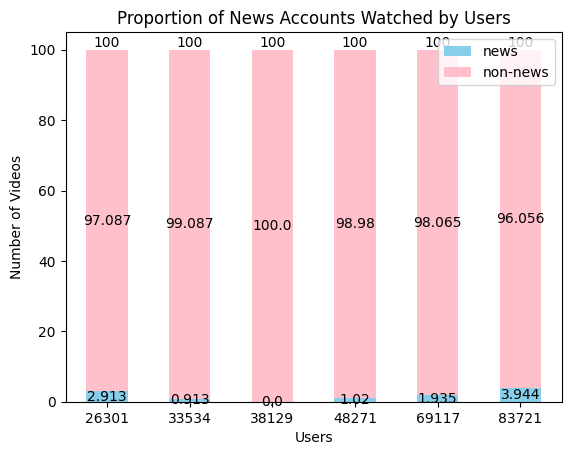

In [289]:
stackplot = newsPercentages.plot(kind='bar', stacked=True, color=["skyblue", "pink"])
stackplot.set_title("Proportion of News Accounts Watched by Users")
stackplot.set_ylabel("Number of Videos")
stackplot.set_xlabel("Users")
stackplot.set_xticklabels(stackplot.get_xticklabels(), rotation=0)
stackplot.bar_label(stackplot.containers[1])

cumulative_values = newsPercentages.cumsum(axis=1)
for i in range(len(newsPercentages)):
    for j, val in enumerate(newsPercentages.columns):
        stackplot.text(i, cumulative_values.iloc[i, j] - newsPercentages[val][i] / 2,
                       str(newsPercentages[val][i]), ha='center', va='center',)